<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/FinalProject5290_LogisticReg_RandomForest_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team Members:

#### Joseph Mart (Project Lead)- A00732897

#### Callitus Obunadike - A00756855

This dataset contains records of simulation crashes encountered during climate model uncertainty quantification (UQ) ensembles.

Ensemble members were constructed using a Latin hypercube method in LLNL's UQ Pipeline software system to sample the uncertainties of 18 model parameters within the Parallel Ocean Program (POP2) component of the Community Climate System Model (CCSM4).

Three separate Latin hypercube ensembles were conducted, each containing 180 ensemble members. 46 out of the 540 simulations failed for numerical reasons at combinations of parameter values.

The goal is to use classification to predict simulation outcomes (fail or succeed) from input parameter values, and to use sensitivity analysis and feature selection to determine the causes of simulation crashes.

Further details about the data and methods are given in the publication 'Failure Analysis of Parameter-Induced Simulation Crashes in Climate Models,' Geoscientific Model Development ([Web Link: https://archive.ics.uci.edu/ml/datasets/Climate+Model+Simulation+Crashes]).

In [69]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

#### 1. (Data preparation) Bring in the data D into Python. Inspect if there is any missing values and, if so, handle them with imputation.

In [70]:
df = pd.read_csv('pop_failures.txt', delimiter = "\t")

In [71]:
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869090703,0.997518496,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914343667,0.845247142,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995161,0.718441133,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761658752,0.362750561,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349434,0.650222833,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [ ]:
#Dimansion of data
df.shape

(540, 21)

In [ ]:
# Checking for missing values

df.isnull().sum()

Study                   0
Run                     0
vconst_corr             0
vconst_2                0
vconst_3                0
vconst_4                0
vconst_5                0
vconst_7                0
ah_corr                 0
ah_bolus                0
slm_corr                0
efficiency_factor       0
tidal_mix_max           0
vertical_decay_scale    0
convect_corr            0
bckgrnd_vdc1            0
bckgrnd_vdc_ban         0
bckgrnd_vdc_eq          0
bckgrnd_vdc_psim        0
Prandtl                 0
outcome                 0
dtype: int64

There are no missing values

In [ ]:
#Check overall datatypes of all columns

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_7              540 non-null    float64
 8   ah_corr               540 non-null    float64
 9   ah_bolus              540 non-null    float64
 10  slm_corr              540 non-null    float64
 11  efficiency_factor     540 non-null    float64
 12  tidal_mix_max         540 non-null    float64
 13  vertical_decay_scale  540 non-null    object 
 14  convect_corr          540 non-null    object 
 15  bckgrnd_vdc1          5

Data Types of columns fall into any of the 3 types: int64, float64, object 

#### 2. (Exploratory Data Analysis) Explore the data with EDA and present at least THREE interesting finndings.

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    num_of_values = len(unique_vals)
    if num_of_values < 5:
        print('The number of distinct values for feature  {} is/are:  {} -- {}'.format(column, num_of_values,unique_vals))
    else:
        print('The number of distinct values for feature  {} is/are:  {}'.format(column, num_of_values))

The number of distinct values for feature  Study is/are:  3 -- [1 2 3]
The number of distinct values for feature  Run is/are:  180
The number of distinct values for feature  vconst_corr is/are:  540
The number of distinct values for feature  vconst_2 is/are:  540
The number of distinct values for feature  vconst_3 is/are:  540
The number of distinct values for feature  vconst_4 is/are:  540
The number of distinct values for feature  vconst_5 is/are:  540
The number of distinct values for feature  vconst_7 is/are:  540
The number of distinct values for feature  ah_corr is/are:  540
The number of distinct values for feature  ah_bolus is/are:  540
The number of distinct values for feature  slm_corr is/are:  540
The number of distinct values for feature  efficiency_factor is/are:  540
The number of distinct values for feature  tidal_mix_max is/are:  540
The number of distinct values for feature  vertical_decay_scale is/are:  540
The number of distinct values for feature  convect_corr is/ar


All the columns are continuous in nature except Study and outcom with 3 and 2 categories respectively

Study is/are:  3 -- [1 2 3], outcome is/are:  2 -- [0 1]

All the columns have 540 each uniques occurences except Run which has  180

<AxesSubplot:xlabel='Study', ylabel='count'>

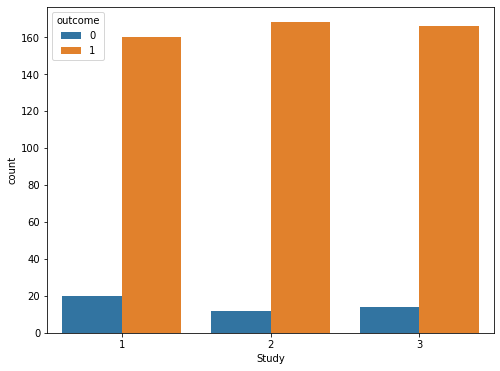

In [ ]:
#Association between Study and the outcome

plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Study', hue='outcome')

About 20 failed and 160 succeeded in Study in category 1

About 15 failed and 170 succeeded in Study in category 2

About 18 failed and 165 succeeded in Study in category 3

We will convert Study to dummy

In [72]:
# Get Dummy for Study:
df = pd.get_dummies(df, prefix='Study',columns=['Study'], drop_first=True)

In [73]:
df.head(2)

,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,...,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome,Study_2,Study_3
0,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,...,0.869090703,0.997518496,0.448620,0.307522,0.858310,0.796997,0.869893,0,0,0
1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,...,0.914343667,0.845247142,0.864152,0.346713,0.356573,0.438447,0.512256,1,0,0


<AxesSubplot:xlabel='outcome', ylabel='count'>

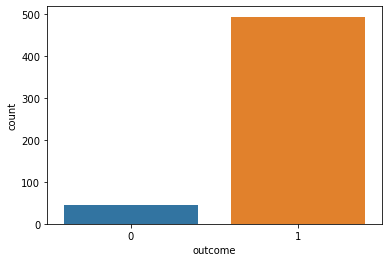

In [ ]:
#Response Balancesness :  frequency distribution

sns.countplot(data=df,x='outcome')

In [ ]:
df["outcome"].value_counts()

1    494
0     46
Name: outcome, dtype: int64

The response variable is very unbalanced, there are 494 sucesses and 46 failuers

<AxesSubplot:xlabel='outcome', ylabel='bckgrnd_vdc_eq'>

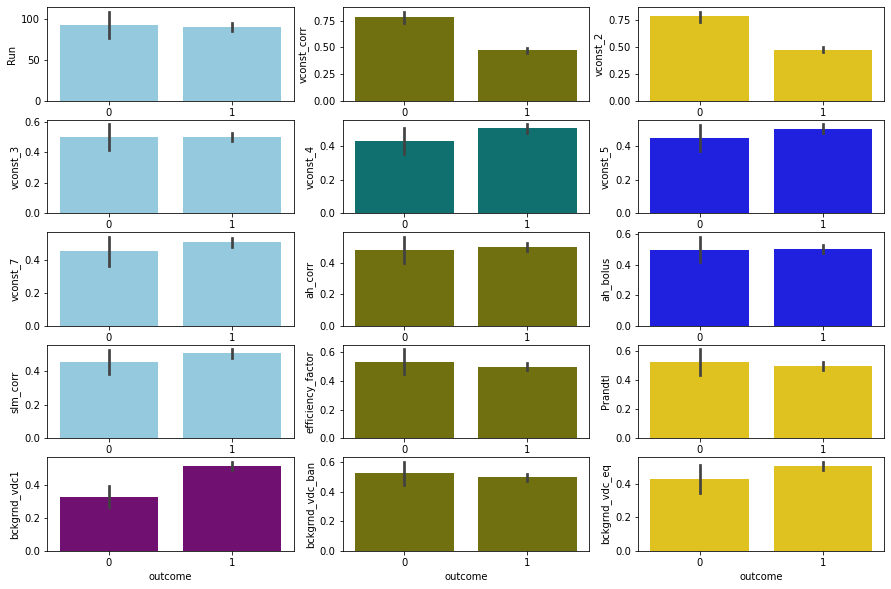

In [ ]:
#Checking the distribution count of the outcome variable against some predictors

fig,axs = plt.subplots(5,3, figsize = (15,10))

sns.barplot(data=df,x ='outcome' ,y="Run",  color="skyblue", ax=axs[0, 0])
sns.barplot(data=df, x ='outcome', y="vconst_corr", color="olive", ax=axs[0, 1])
sns.barplot(data=df, x ='outcome', y="vconst_2", color="gold", ax=axs[0, 2])

sns.barplot(data=df, x ='outcome', y="vconst_3",color="skyblue", ax=axs[1, 0])
sns.barplot(data=df, x ='outcome', y="vconst_4",color="teal", ax=axs[1, 1])
sns.barplot(data=df, x ='outcome', y="vconst_5", color="blue", ax=axs[1, 2])

sns.barplot(data=df, x ='outcome', y="vconst_7", color="skyblue", ax=axs[2,0])
sns.barplot(data=df, x ='outcome', y="ah_corr", color="olive", ax=axs[2,1])
sns.barplot(data=df, x ='outcome', y="ah_bolus", color="blue", ax=axs[2,2])

sns.barplot(data=df, x ='outcome', y="slm_corr", color="skyblue", ax=axs[3,0])
sns.barplot(data=df, x ='outcome', y="efficiency_factor", color="olive", ax=axs[3,1])
sns.barplot(data=df, x ='outcome', y="Prandtl", color="gold", ax=axs[3,2])

sns.barplot(data=df, x ='outcome', y="bckgrnd_vdc1", color="purple", ax=axs[4,0])
sns.barplot(data=df, x ='outcome', y="bckgrnd_vdc_ban", color="olive", ax=axs[4,1])
sns.barplot(data=df, x ='outcome', y="bckgrnd_vdc_eq", color="gold", ax=axs[4,2])


The above shows that barplot of some of the features against the response

#### Investigating Multicolinearity

In [ ]:
dfcor = df.drop(columns=['outcome'])

In [ ]:
plt.figure(figsize=(10,8)) #Set figure size
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome,Study_2,Study_3
Run,1.000000,-0.034414,-0.058644,-0.018387,-0.021134,-0.042972,-0.040134,-0.039149,-0.094475,0.011829,0.080217,-0.003172,-0.047611,0.045694,-0.105921,-0.014953,0.039661,-0.013916,0.000000,0.000000
vconst_corr,-0.034414,1.000000,0.004039,0.009331,-0.018294,0.018880,0.001544,0.003714,-0.012735,0.002336,0.010617,-0.014205,-0.002133,-0.002099,0.015973,-0.016631,-0.001467,-0.304787,-0.000079,-0.000305
vconst_2,-0.058644,0.004039,1.000000,-0.000456,-0.000614,-0.008292,-0.024379,-0.005182,0.004179,-0.013860,-0.011072,0.019706,-0.014716,0.004386,0.005999,0.004202,0.009141,-0.302388,-0.000273,0.000402
vconst_3,-0.018387,0.009331,-0.000456,1.000000,0.009899,0.006289,-0.001587,0.019941,0.004402,-0.007695,0.007100,-0.009428,-0.004264,-0.005210,-0.000559,0.004771,-0.001334,0.000227,0.000107,-0.000505
vconst_4,-0.021134,-0.018294,-0.000614,0.009899,1.000000,0.020504,0.021931,0.001805,-0.002334,-0.001731,-0.004753,0.018320,0.020442,-0.001080,-0.009262,-0.017147,0.005053,0.072297,-0.000243,0.000331
vconst_5,-0.042972,0.018880,-0.008292,0.006289,0.020504,1.000000,0.005887,-0.003047,0.012453,0.003634,0.001077,0.021354,0.009894,-0.019179,-0.020752,-0.009324,0.012265,0.054390,0.000324,-0.000236
vconst_7,-0.040134,0.001544,-0.024379,-0.001587,0.021931,0.005887,1.000000,-0.016770,-0.021644,0.001244,0.015121,0.000075,-0.003641,-0.007897,-0.006576,0.013203,0.008412,0.048646,0.000333,-0.000540
ah_corr,-0.039149,0.003714,-0.005182,0.019941,0.001805,-0.003047,-0.016770,1.000000,-0.035498,-0.005119,0.009604,-0.006832,0.012447,-0.003368,0.007051,0.002443,-0.002381,0.017049,0.000056,0.000192
ah_bolus,-0.094475,-0.012735,0.004179,0.004402,-0.002334,0.012453,-0.021644,-0.035498,1.000000,-0.009403,0.012260,0.012005,-0.010642,0.004866,0.032398,0.000259,0.007055,0.003895,-0.000051,0.000070
slm_corr,0.011829,0.002336,-0.013860,-0.007695,-0.001731,0.003634,0.001244,-0.005119,-0.009403,1.000000,0.008760,0.002575,-0.003043,0.006023,-0.008447,-0.002301,0.014281,0.048864,0.000151,-0.000198


<Figure size 720x576 with 0 Axes>

In [ ]:
# Pairing Multicolinear Features

correlatedColumns = []
corr = dfcor.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.7
negthreshold = -0.7

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)

No Multicolinearity found in dataset


The features are not collinear with one another above +- 0.7 correlation

#### Convert object to numeric
We need to convert vertical_decay_scale  and  convect_corr  from object to numeric before we will be able to split data into training and testing

In [74]:
# The varaible was imported as a string we need to convert it to float
df["vertical_decay_scale"]=pd.to_numeric(df["vertical_decay_scale"],errors="coerce")


In [75]:
# The varaible was imported as a string we need to convert it to float
df["convect_corr"]=pd.to_numeric(df["convect_corr"],errors="coerce")

In [ ]:
#Check the data for missing value again
df.isnull().sum()

Run                       0
vconst_corr               0
vconst_2                  0
vconst_3                  0
vconst_4                  0
vconst_5                  0
vconst_7                  0
ah_corr                   0
ah_bolus                  0
slm_corr                  0
efficiency_factor         0
tidal_mix_max             0
vertical_decay_scale    180
convect_corr            180
bckgrnd_vdc1              0
bckgrnd_vdc_ban           0
bckgrnd_vdc_eq            0
bckgrnd_vdc_psim          0
Prandtl                   0
outcome                   0
Study_2                   0
Study_3                   0
dtype: int64

In [ ]:
df.shape

(540, 22)

In [ ]:
# Visualize the NULL observations

df[df['vertical_decay_scale'].isnull()]

,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,...,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome,Study_2,Study_3
360,1,0.809543,0.837511,0.073442,0.589892,0.868431,0.351131,0.389901,0.188123,0.536543,...,NaN,NaN,0.842952,0.048439,0.330238,0.255728,0.565440,1,0,1
361,2,0.369924,0.987699,0.170430,0.981563,0.068741,0.280620,0.613980,0.321236,0.543237,...,NaN,NaN,0.196828,0.606249,0.750256,0.094154,0.666742,1,0,1
362,3,0.714288,0.792418,0.789954,0.906748,0.863046,0.386705,0.593317,0.881642,0.622044,...,NaN,NaN,0.039313,0.591884,0.432448,0.407422,0.175843,1,0,1
363,4,0.967564,0.541932,0.133147,0.851643,0.628999,0.921785,0.772271,0.942169,0.379395,...,NaN,NaN,0.952149,0.819902,0.952324,0.494093,0.607461,1,0,1
364,5,0.749636,0.178136,0.428031,0.631460,0.017963,0.859604,0.028397,0.126187,0.922381,...,NaN,NaN,0.827444,0.223857,0.650470,0.799945,0.229589,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,0.400102,...,NaN,NaN,0.459479,0.334482,0.573002,0.610183,0.737706,1,0,1
536,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,0.263398,...,NaN,NaN,0.347027,0.512499,0.810549,0.593332,0.142565,0,0,1
537,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,0.870987,...,NaN,NaN,0.381966,0.198811,0.867108,0.461632,0.652817,1,0,1
538,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,0.267685,...,NaN,NaN,0.981656,0.113193,0.364799,0.201469,0.536535,1,0,1


The missing values is too large than what we can replace to avoid introducing biasness into the data, we will have to drop both columns in this case
Those null values came in as a result of the dummy we introduced for the Study Category

In [76]:
#Drop 'convect_corr' and 'vertical_decay_scale

df.drop(columns=['convect_corr', 'vertical_decay_scale'], axis = 1,inplace=True)

In [ ]:
df.shape

(540, 20)

#### Satndardize the Continuous Features

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Scaling our columns except the target
scale_vars = ['Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max','bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl'
             ]

scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars]) 

df.head()

,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome,Study_2,Study_3
0,0.000000,0.859671,0.928788,0.252421,0.298148,0.169988,0.737921,0.426147,0.568669,0.474011,0.244266,0.103856,0.447325,0.307274,0.860540,0.797506,0.870159,0,0,0
1,0.005587,0.606367,0.457227,0.359316,0.306302,0.844088,0.937501,0.442487,0.829203,0.295175,0.616383,0.975832,0.863988,0.346527,0.356977,0.438628,0.512305,1,0,0
2,0.011173,0.998404,0.372474,0.517729,0.505192,0.619230,0.607119,0.745857,0.195983,0.817388,0.679023,0.803377,0.924776,0.315136,0.250661,0.285677,0.365818,1,0,0
3,0.016760,0.783951,0.102452,0.196926,0.421678,0.742619,0.491993,0.000941,0.392530,0.006825,0.470614,0.597745,0.912788,0.978782,0.848106,0.699851,0.476013,1,0,0
4,0.022346,0.406331,0.512871,0.060808,0.636602,0.845558,0.442502,0.188403,0.488124,0.357468,0.550894,0.743812,0.521167,0.042880,0.377137,0.280134,0.132101,1,0,0


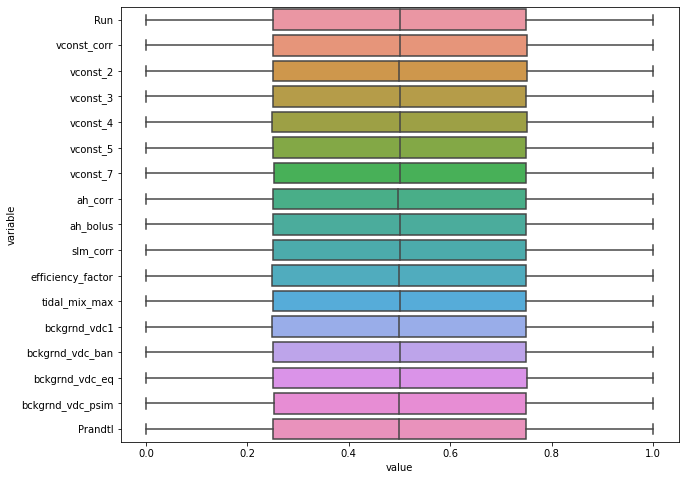

In [ ]:
#Checking Predictors for outliers in continuous features
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

d = pd.DataFrame(data=df, columns=['Run', 'vconst_corr', 'vconst_2', 'vconst_3', 'vconst_4',
       'vconst_5', 'vconst_7', 'ah_corr', 'ah_bolus', 'slm_corr',
       'efficiency_factor', 'tidal_mix_max', 'bckgrnd_vdc1', 'bckgrnd_vdc_ban', 'bckgrnd_vdc_eq',
       'bckgrnd_vdc_psim', 'Prandtl'])

sns.boxplot(y="variable", x="value", data=pd.melt(d))
plt.show()

There is no outlier dectected

#### 3. (Data partition) Randomly split the data D into the training set D1 and the test set D2 with a ratio of approximately 2:1 in sample size. Use set.seed() to fix the random seed so that the results are easily reproducible.

### Splitting the Data

Before building the model, we need to split the data into train and test data. Then we will build the model using train data and evaluate the model on test data.

We will use the test_train_split sklearn libray to split the data.

We have to divide the dataset into X and y dataframes first

### Feature Selection

Using the RFE feauture in sklean, we will use the first 14 important predictors rather using everything for our model

In [78]:
X1 = df.drop(columns=['outcome'], axis = 1)
y = df['outcome']

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logmodel, n_features_to_select=14, step=1, importance_getter="auto",)             # RFE with 14 variables as output
rfe = rfe.fit(X1, y)

#Join the columns and the rfe ranking
list(zip(X1.columns, rfe.support_, rfe.ranking_))

[('Run', True, 1),
 ('vconst_corr', True, 1),
 ('vconst_2', True, 1),
 ('vconst_3', False, 6),
 ('vconst_4', True, 1),
 ('vconst_5', True, 1),
 ('vconst_7', True, 1),
 ('ah_corr', False, 3),
 ('ah_bolus', False, 2),
 ('slm_corr', True, 1),
 ('efficiency_factor', True, 1),
 ('tidal_mix_max', False, 4),
 ('bckgrnd_vdc1', True, 1),
 ('bckgrnd_vdc_ban', True, 1),
 ('bckgrnd_vdc_eq', True, 1),
 ('bckgrnd_vdc_psim', True, 1),
 ('Prandtl', False, 5),
 ('Study_2', True, 1),
 ('Study_3', True, 1)]

The 14 important features are the ones that have rankings of [True,1]. We will drop the unimportant variables with [rfe.support_=False]

In [81]:
#True X an y : We will drop those with False 'rfe.suppor'

X = X1.drop(columns=['vconst_3', 'ah_corr', 'ah_bolus','tidal_mix_max','Prandtl'], axis = 1)
y = df['outcome']

In [82]:
X

,Run,vconst_corr,vconst_2,vconst_4,vconst_5,vconst_7,slm_corr,efficiency_factor,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Study_2,Study_3
0,0.000000,0.859671,0.928788,0.298148,0.169988,0.737921,0.474011,0.244266,0.447325,0.307274,0.860540,0.797506,0,0
1,0.005587,0.606367,0.457227,0.306302,0.844088,0.937501,0.295175,0.616383,0.863988,0.346527,0.356977,0.438628,0,0
2,0.011173,0.998404,0.372474,0.505192,0.619230,0.607119,0.817388,0.679023,0.924776,0.315136,0.250661,0.285677,0,0
3,0.016760,0.783951,0.102452,0.421678,0.742619,0.491993,0.006825,0.470614,0.912788,0.978782,0.848106,0.699851,0,0
4,0.022346,0.406331,0.512871,0.636602,0.845558,0.442502,0.357468,0.550894,0.521167,0.042880,0.377137,0.280134,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.977654,0.657524,0.488972,0.411748,0.087088,0.357003,0.399290,0.279224,0.458214,0.334277,0.574193,0.610521,0,1
536,0.983240,0.916598,0.843419,0.089032,0.336768,0.896088,0.261753,0.798072,0.345456,0.512575,0.812605,0.593655,0,1
537,0.988827,0.478770,0.942190,0.952901,0.188910,0.112643,0.873045,0.191563,0.380490,0.198392,0.869370,0.461834,0,1
538,0.994413,0.007388,0.779788,0.705883,0.984308,0.421232,0.266066,0.761005,0.981812,0.112638,0.365232,0.201434,0,1


In [83]:
# Importing libraries to split the data

from sklearn.model_selection import train_test_split

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)

X shape: (540, 14)
y shape: (540,)


#### 4. In the steps to follow, we will train several classifiers with D1 and then apply each trained model on D2 to predict whether a simulation fails. For each approach, obtain the misclassification rate (with default cutoff point 0.50), the ROC curve and the cor-responding AUC based on the prediction on D2. Compare the performance of all these classifiers and summarize the results.

#### (a) (Logistic Regression) Fit a regularized logistic regression model as one baseline classifier for comparison. You may use either LASSO or SCAD or any other penalty 1 function of your choice. Explain how the optimal tuning parameter is determined and interpret the results.

In [84]:
from sklearn.linear_model import LogisticRegression

lasso_log_reg = LogisticRegression(penalty='l1', solver='saga',  C=1.0)   #penalty = 'l1' mean Lasso

threshold = 0.5

lasso_log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [85]:
#Prediction
y_predm1 =  lasso_log_reg.predict(X_test)

In [86]:
#Prediction Probability
predict_prob = lasso_log_reg.predict_proba(X_test)[:,1]
predict_prob

array([0.95689029, 0.61499595, 0.94809525, 0.98605677, 0.95648519,
       0.85183352, 0.97055621, 0.98499662, 0.94801075, 0.67041253,
       0.98092325, 0.9966731 , 0.99904798, 0.9949677 , 0.8428332 ,
       0.99651174, 0.99790497, 0.37270588, 0.98730694, 0.83180993,
       0.98616554, 0.9828943 , 0.43262059, 0.99342111, 0.81587592,
       0.87445558, 0.83967168, 0.93915151, 0.99676812, 0.94803464,
       0.81378296, 0.92870133, 0.98437434, 0.99191843, 0.96777997,
       0.87520773, 0.98038759, 0.98661194, 0.976612  , 0.93964813,
       0.93093423, 0.97659534, 0.99530991, 0.99924293, 0.83993478,
       0.96537829, 0.98020074, 0.99893371, 0.99736927, 0.98043797,
       0.99686524, 0.99975921, 0.66702698, 0.99730096, 0.99274769,
       0.83346173, 0.80193685, 0.99185737, 0.99980203, 0.99488031,
       0.98371986, 0.96683167, 0.71531797, 0.97422796, 0.74373838,
       0.96764764, 0.96214305, 0.97633139, 0.98785902, 0.96868324,
       0.73748776, 0.98824959, 0.68591494, 0.99703417, 0.45345

### Misclassification rate

In [87]:
#Confusion Metrics

confusion_matrix(y_test, y_predm1)

array([[  5,  12],
       [  1, 144]])

There are 13 misclassifications using the test set

In [91]:
print("Accuracy Score: ", lasso_log_reg.score(X_test, y_test)*100,'%')

Accuracy Score:  91.9753086419753 %


### ROC

In [92]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

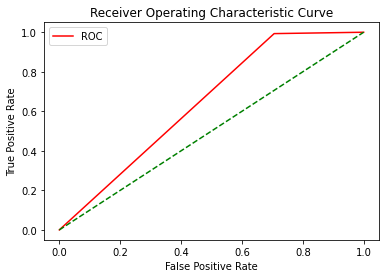

In [93]:
#ROC Curve

fper, tper, thresholds = roc_curve(y_test, y_predm1)
plot_roc_curve(fper, tper)

### Explain how the optimal tuning parameter is determined and interpret the results

We tune the Lasso model to obtain the best C-Param and built a final Lasso Model which has better classification rate than the initial Lasso

#### Hyper-Parameter Tuning for the Lasso Model

In [94]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

kf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)

#Range of C-Values
C_List = np.geomspace(1e-5, 1e5, num=100)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The Score Accuracy is:", Log_reg3.score(X_test, y_test))

#Log Loss and C Parameter
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)
print("The optimal C parameter is: ", Log_reg3.C_)

The Score Accuracy is: 0.9320987654320988
The Logistic Loss is:  0.15992497931165933
The optimal C parameter is:  [475.08101621]


In [98]:
final_Lasso = LogisticRegression(random_state=10,solver = 'saga', C=475.08101621, penalty='l1')  # penalty='l1' -> Lasso

# Training my model
final_Lasso.fit(X_train, y_train)

#Prediction
y_predfinal= final_Lasso.predict(X_test)

#Accuracy
print('Final Lasso Model Accuracy on Test Data is: ', accuracy_score(y_test, y_predfinal))

print(end='\n\n\n')


#Confusion Metrics
confusion_matrix(y_test, y_predfinal)

Final Lasso Model Accuracy on Test Data is:  0.9320987654320988





array([[ 12,   5],
       [  6, 139]])

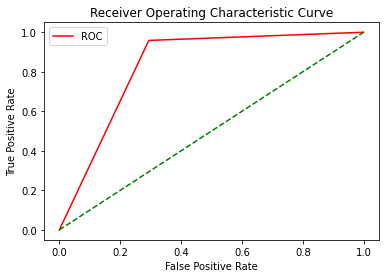

In [99]:
#ROC Curve

fper, tper, thresholds = roc_curve(y_test, y_predfinal)
plot_roc_curve(fper, tper)

#### (b) (Random Forest) Fit random forests as another baseline for comparison. Also,obtain the variable importance ranking from RF.

In [100]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf.fit(X_train, y_train)

pred_clf = clf.predict(X_test)

In [101]:
# Accuracy on Test
print("Training Accuracy is: ", clf.score(X_train, y_train)*100,'%')

# Accuracy on Train
print("Testing Accuracy is: ", clf.score(X_test, y_test)*100,'%', end='\n\n\n')

Training Accuracy is:  100.0 %
Testing Accuracy is:  89.50617283950618 %




In [102]:
#Confusion Metrics

confusion_matrix(y_test, pred_clf)

array([[  1,  16],
       [  1, 144]])

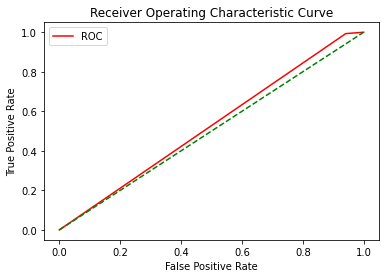

In [103]:
#ROC

fper, tper, thresholds = roc_curve(y_test, pred_clf)
plot_roc_curve(fper, tper)

#### Variable importance ranking from RF

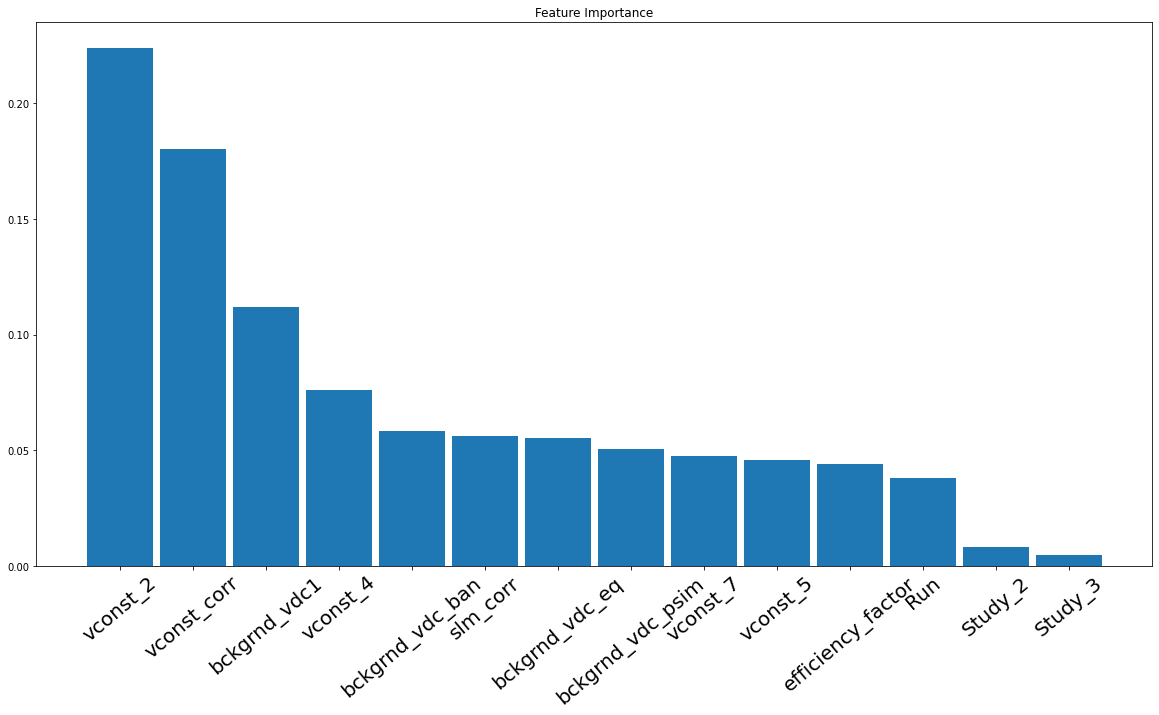

In [107]:
plt.figure(figsize=(20,10))

# Calculate feature importances
importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices],width=0.9)
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=40, fontsize = 20)

# Create plot title
plt.title("Feature Importance")

# Show plot
plt.show()

#### (c) (Artificial Neural Network) Fit at least three different artificial neural network (ANN) models, e.g., with different numbers of layers and different number of neurons.

In [108]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [109]:
#ANN Model 1: 21 neurons 3 Layers

# define the keras model
ann1 = Sequential()
ann1.add(Dense(12, input_dim=14, activation='relu'))
ann1.add(Dense(8, activation='relu'))
ann1.add(Dense(1, activation='sigmoid'))

# compile the keras model
ann1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
ann1.fit(X_train, y_train, epochs=50, batch_size=10)
print(end='\n\n\n')

# evaluate the keras model
_, accuracy = ann1.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
38/38 [==============================] - 1s 1ms/step - loss: 0.8279 - accuracy: 0.1640 
Epoch 2/50
38/38 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.7169
Epoch 3/50
38/38 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.9074
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.9233
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.9233
Epoch 6/50
38/38 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.9233
Epoch 7/50
38/38 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.9233
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.9233
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.9233
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 11/50
38/38 

In [110]:
# make class predictions with the model with threshold > 0.5
ann1Pred = (ann1.predict(X_test) > 0.5).astype(int)

#Confusion Metrics
confusion_matrix(y_test, ann1Pred)

array([[  6,  11],
       [  6, 139]])

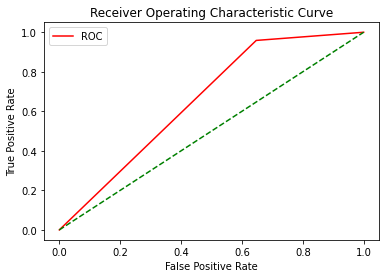

In [111]:
### ROC
fper, tper, thresholds = roc_curve(y_test, ann1Pred)
plot_roc_curve(fper, tper)

In [112]:
#ANN Model 2: 15 neurons 2 Layers

# define the keras model
ann2 = Sequential()
ann2.add(Dense(14, input_dim=14, activation='relu'))
ann2.add(Dense(1, activation='sigmoid'))

# compile the keras model
ann2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
ann2.fit(X_train, y_train, epochs=50, batch_size=10)
print(end='\n\n\n')

# evaluate the keras model
_, accuracy = ann2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
38/38 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.9233
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9233
Epoch 3/50
38/38 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9233
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9233
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9233
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9233
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9233
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9233
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9233
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9233
Epoch 11/50
38/38 [

In [113]:
# make class predictions with the model with threshold > 0.5
ann2Pred = (ann1.predict(X_test) > 0.5).astype(int)

#Confusion Metrics
confusion_matrix(y_test, ann2Pred)

array([[  6,  11],
       [  6, 139]])

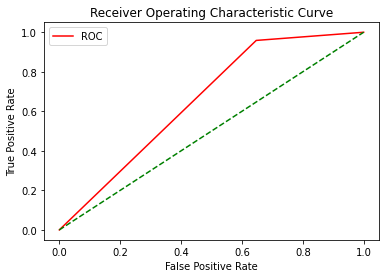

In [114]:
#ROC
fper, tper, thresholds = roc_curve(y_test, ann2Pred)
plot_roc_curve(fper, tper)

In [115]:
#ANN Model 3: 43 neurons 4 Layers

# define the keras model
ann3 = Sequential()
ann3.add(Dense(20, input_dim=14, activation='relu'))
ann3.add(Dense(12, activation='relu'))
ann3.add(Dense(10, activation='sigmoid'))
ann3.add(Dense(1, activation='sigmoid'))

# compile the keras model
ann3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
ann3.fit(X_train, y_train, epochs=50, batch_size=10)
print(end='\n\n\n')

# evaluate the keras model
_, accuracy = ann3.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/50
38/38 [==============================] - 1s 2ms/step - loss: 0.7169 - accuracy: 0.3704
Epoch 2/50
38/38 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.9233
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.9233
Epoch 4/50
38/38 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.9233
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9233
Epoch 6/50
38/38 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.9233
Epoch 7/50
38/38 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.9233
Epoch 8/50
38/38 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.9233
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9233
Epoch 10/50
38/38 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.9233
Epoch 11/50
38/38 [

In [116]:
# make class predictions with the model with threshold > 0.5
ann3Pred = (ann1.predict(X_test) > 0.5).astype(int)

#Confusion Metrics
confusion_matrix(y_test, ann3Pred)

array([[  6,  11],
       [  6, 139]])

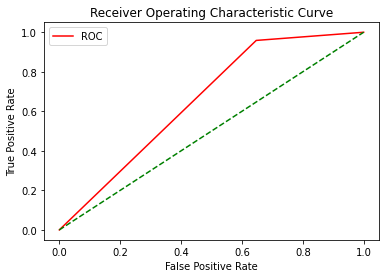

In [117]:
#ROC
fper, tper, thresholds = roc_curve(y_test, ann3Pred)
plot_roc_curve(fper, tper)

We can tune the best of the 3 ANN model and have a beeter model off it, but we are not asked to do so